In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("heart.csv")

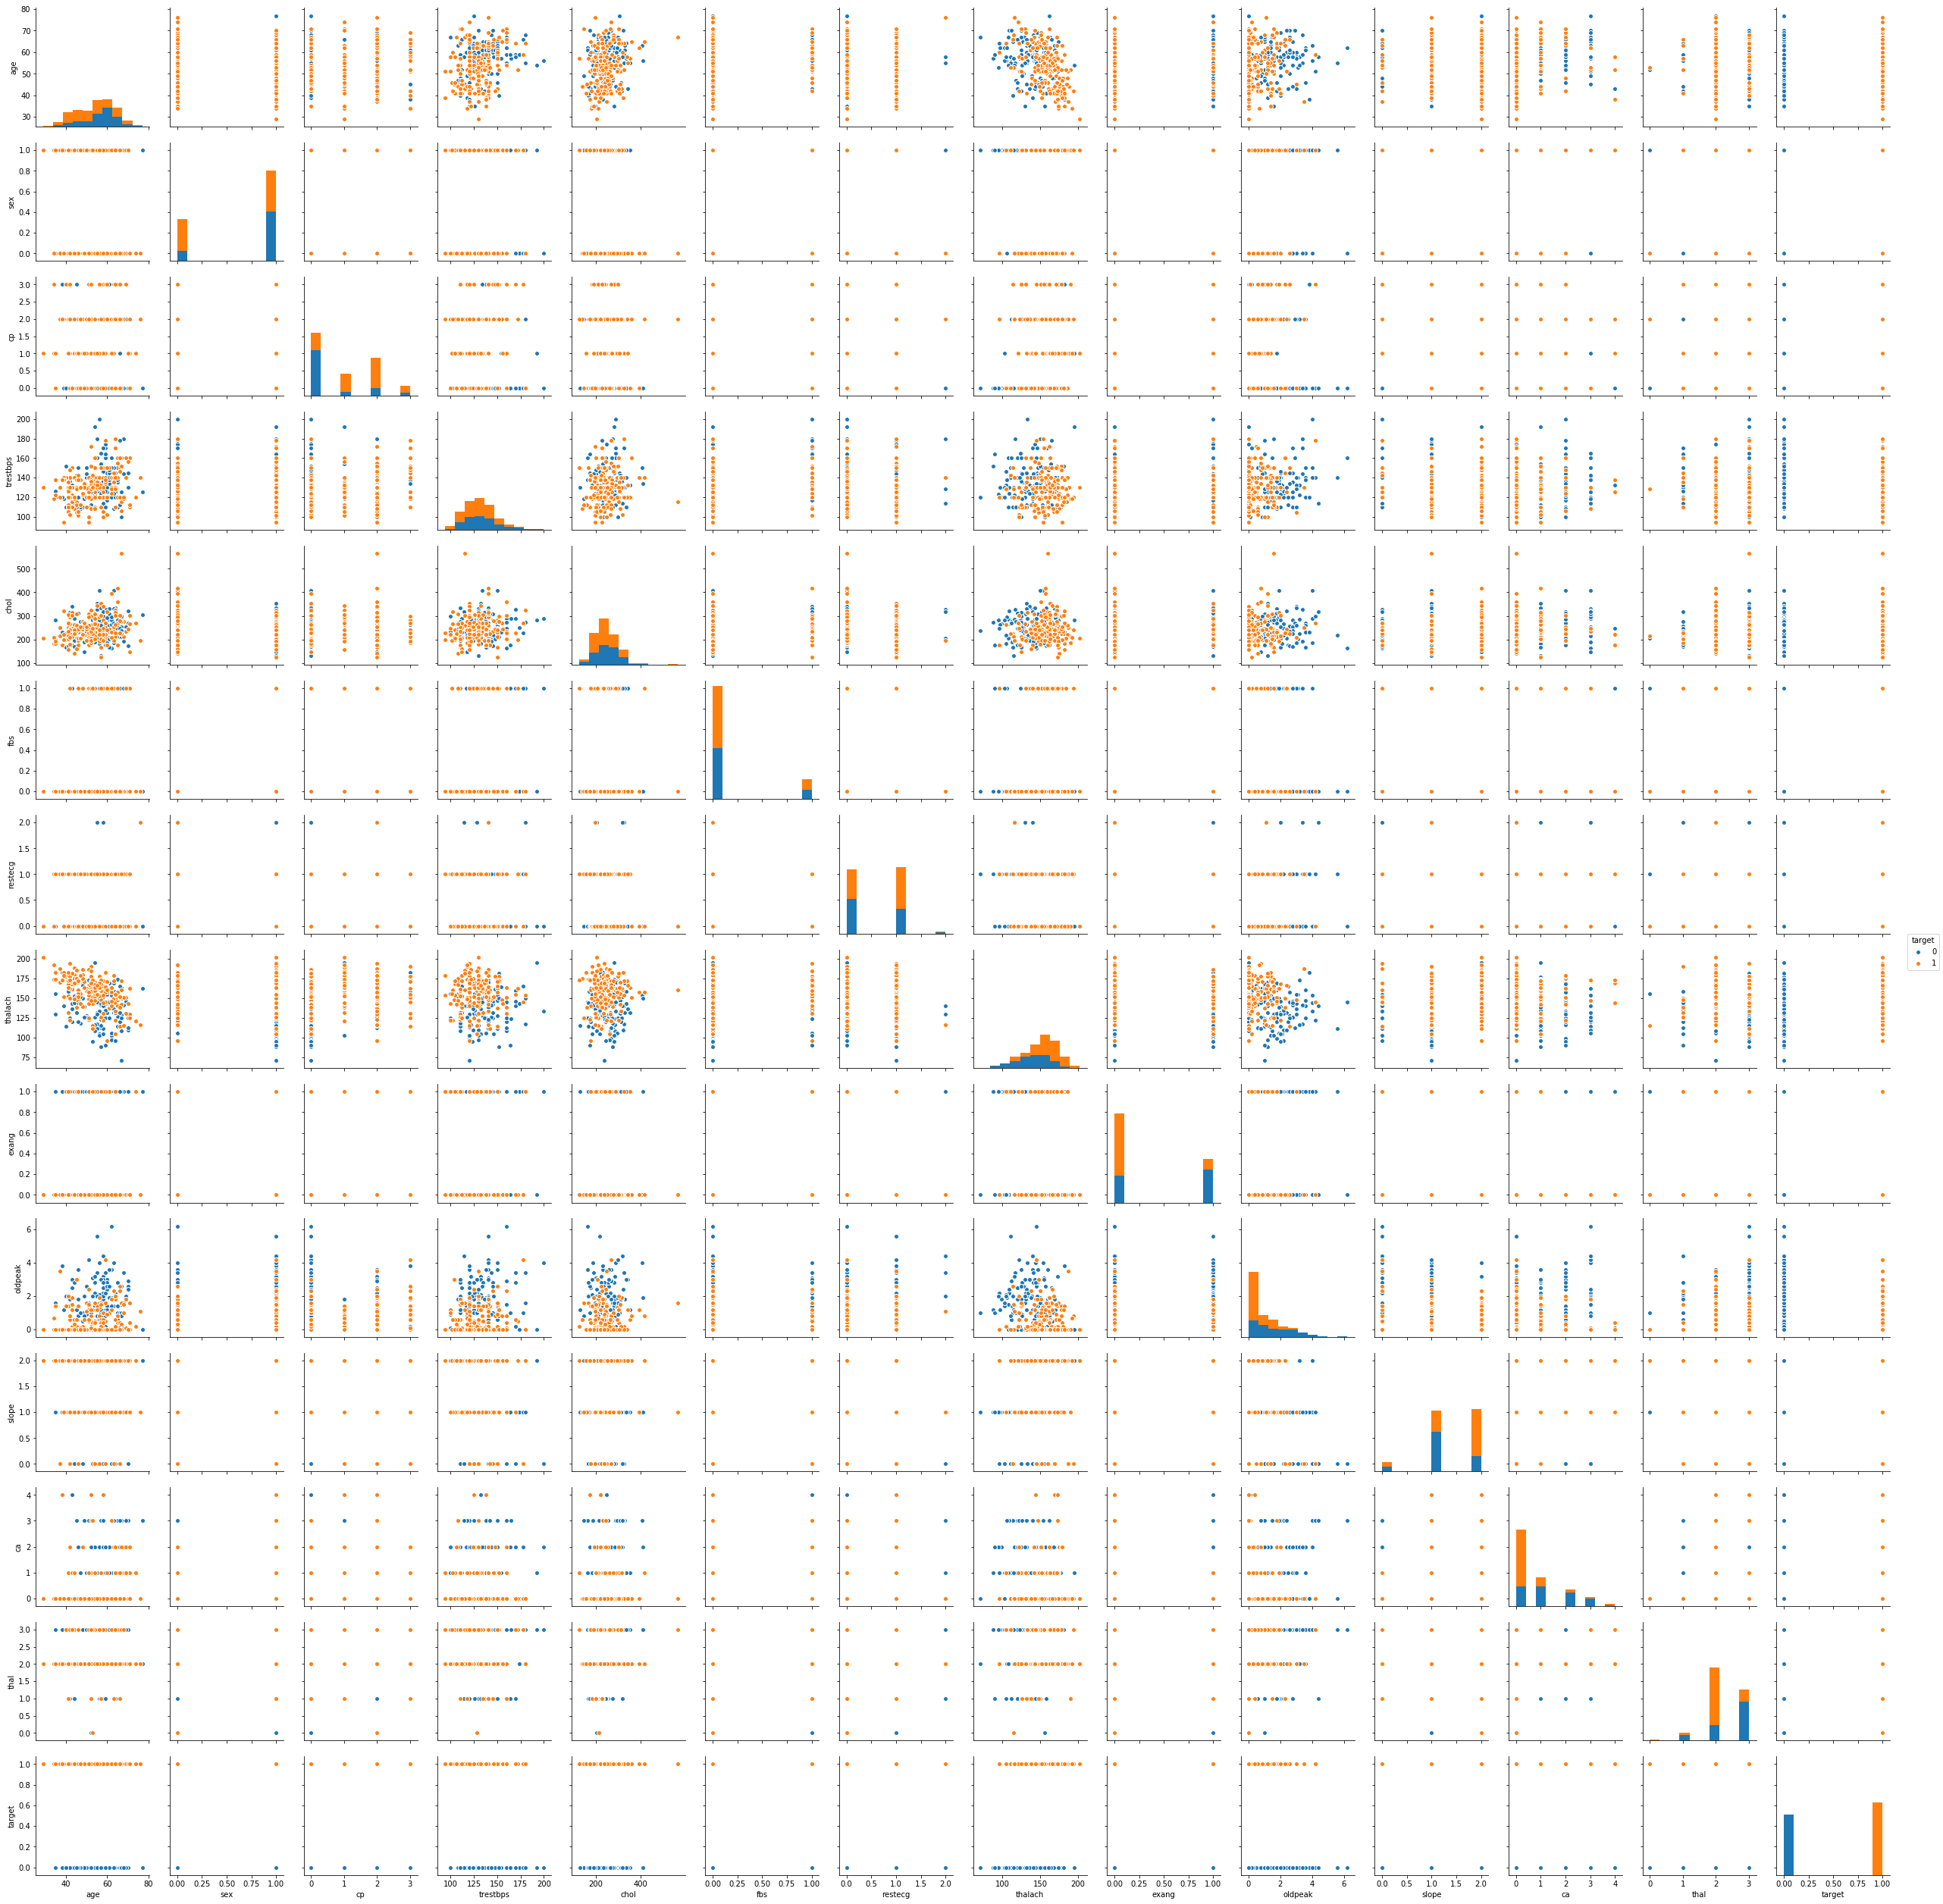

In [32]:
sb.pairplot(df, hue="target")

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


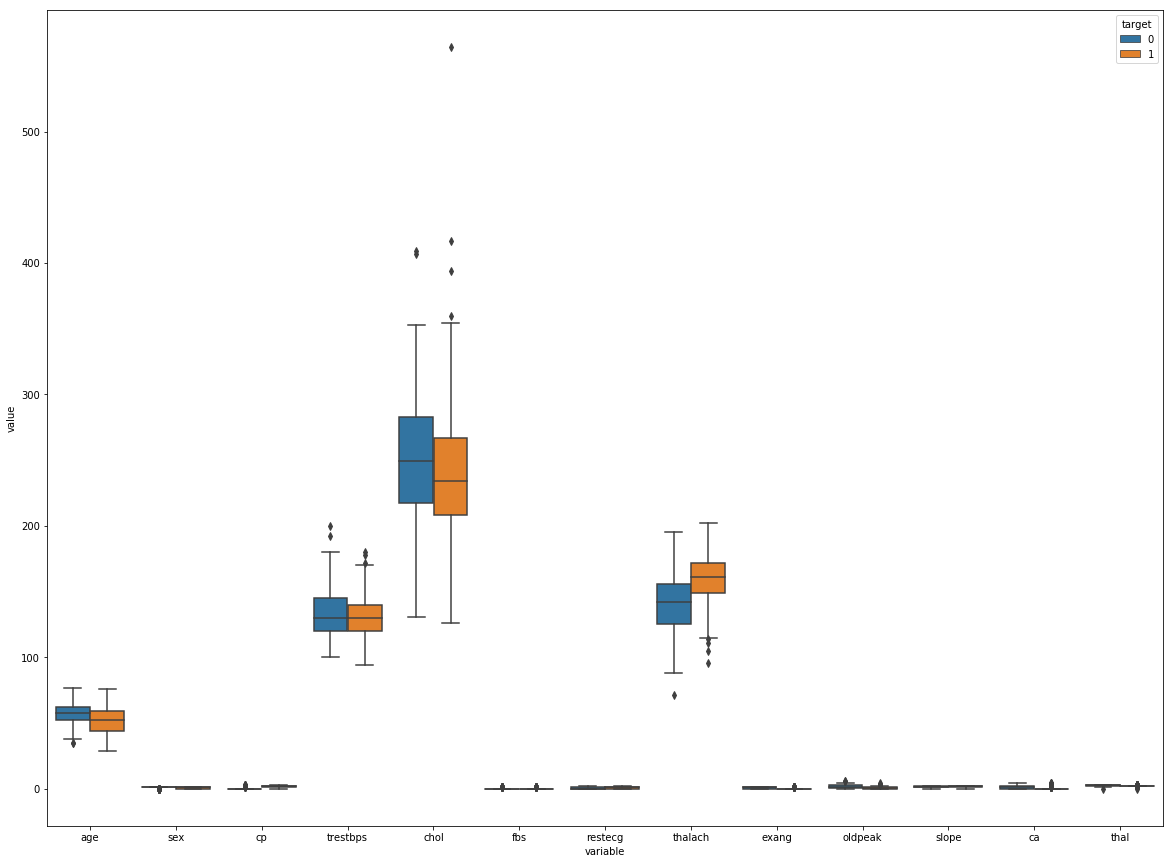

In [34]:
fig, ax = plt.subplots(figsize=(20, 15))
sb.boxplot(data=pd.melt(df, "target", var_name='features'), x="features", y="value", hue="target")

In [35]:
from sklearn.preprocessing import StandardScaler

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [57]:
features = [x for x in df.columns if x != "target"]
X = df[features].values
y = df["target"].values
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
df_s = pd.DataFrame(X_s, columns=features)
df_s["target"] = df["target"]

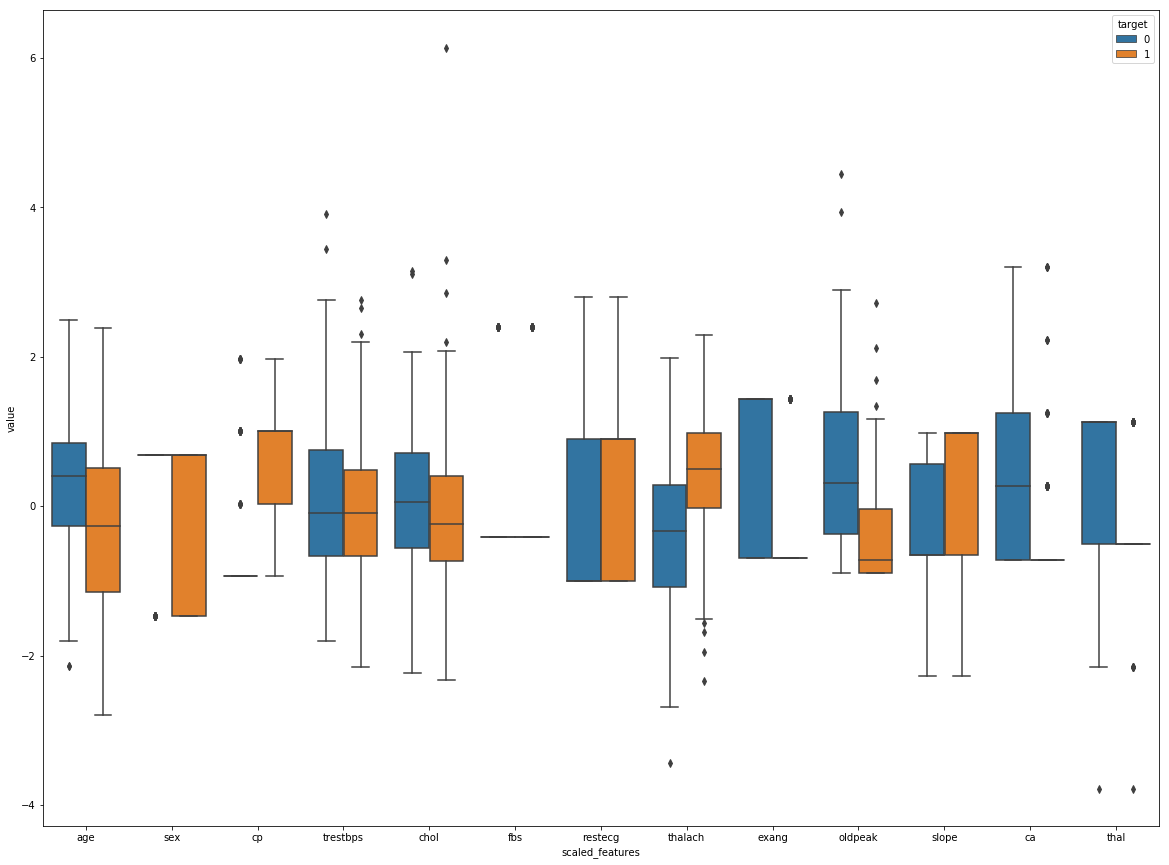

In [55]:
fig, ax = plt.subplots(figsize=(20, 15))
sb.boxplot(data=pd.melt(df_s, "target", var_name='scaled_features'), x="scaled_features", y="value", hue="target")

In [67]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

### Baseline Model

In [59]:
dumb_cls = DummyClassifier(strategy='most_frequent', random_state=0)
dumb_cls.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [60]:
dumb_cls.score(X_test, y_test)

0.5657894736842105

### Logistic Regression

In [69]:
logistic_cls = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
logistic_cls.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
logistic_cls.score(X_test, y_test)

0.8421052631578947

In [71]:
confusion_matrix(logistic_cls.predict(X_test), y_test)

array([[26,  5],
       [ 7, 38]])

In [72]:
roc_auc_score(logistic_cls.predict(X_test), y_test)

0.8415770609318997

In [74]:
fpr, tpr,_ = roc_curve(logistic_cls.predict(X_test), y_test)

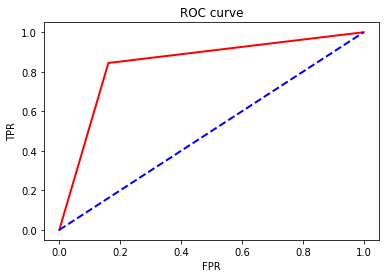

In [75]:
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()